### **import libreries**

In [ ]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score             # check the performance score of our model


In [ ]:
# the dataset
data = pd.read_csv("//content//crd.csv")
data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4558,-1.018567,1.568311,1.744595,0.774484,0.238641,0.070428,0.446372,0.077383,0.620408,...,-0.370338,-0.623279,-0.173651,-0.520257,0.338650,-0.499198,-0.084009,-0.161852,19.99,0
4995,4560,1.108783,0.055038,1.067820,1.762378,-0.479110,0.333237,-0.467694,0.090628,2.155096,...,-0.231608,-0.061360,-0.064749,0.049254,0.588488,-0.297483,0.045084,0.017438,15.00,0
4996,4561,-0.322937,0.914229,2.571751,3.314611,-0.487059,0.701042,-0.240184,0.331519,0.805293,...,0.065633,0.566488,-0.060821,0.327924,-0.561712,0.306355,0.165721,0.148775,15.18,0
4997,4561,-0.594534,0.603273,1.681460,0.331167,0.344769,1.017832,0.597708,-1.541198,0.189042,...,0.177583,-0.468072,-0.109660,-0.362803,-0.456087,-0.470498,-0.612240,-0.511449,56.15,0


In [ ]:
data.shape    # showing the shape of the dataset

(4999, 31)

In [ ]:
#statistical info
data.describe() # giving the information about the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2115.221844,-0.231035,0.255234,0.819478,0.018035,-0.001339,0.176419,0.042220,-0.033852,0.235050,...,-0.022887,-0.150042,-0.041246,0.038171,0.096815,-0.048632,0.038369,0.004919,63.813629,0.044809
std,1310.102385,1.373201,1.161586,1.005885,1.421765,1.193685,1.365788,1.056738,1.198979,0.981329,...,0.795826,0.631919,0.369371,0.619768,0.402316,0.492946,0.334767,0.244351,197.487279,0.206905
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.512377,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,965.500000,-0.979049,-0.326925,0.276994,-0.916689,-0.603296,-0.695901,-0.473188,-0.191965,-0.360733,...,-0.242947,-0.587596,-0.190642,-0.341881,-0.138207,-0.416792,-0.042303,-0.016478,3.800000,0.000000
50%,2072.000000,-0.405257,0.325089,0.847091,0.064782,-0.082993,-0.166386,0.065064,0.038049,0.232645,...,-0.092730,-0.173006,-0.048391,0.103253,0.116469,-0.089835,0.021396,0.019662,15.160000,0.000000
75%,3239.500000,1.126184,0.902100,1.455616,0.990501,0.433876,0.581120,0.584885,0.336568,0.756629,...,0.074382,0.283000,0.085963,0.445400,0.357233,0.248893,0.174102,0.082159,57.170000,0.000000
max,4562.000000,1.685314,6.224859,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,15.631453,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.157934,7712.430000,1.000000


### Data pre_processing

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    4999 non-null   int64  
 1   V1      4999 non-null   float64
 2   V2      4999 non-null   float64
 3   V3      4999 non-null   float64
 4   V4      4999 non-null   float64
 5   V5      4999 non-null   float64
 6   V6      4999 non-null   float64
 7   V7      4999 non-null   float64
 8   V8      4999 non-null   float64
 9   V9      4999 non-null   float64
 10  V10     4999 non-null   float64
 11  V11     4999 non-null   float64
 12  V12     4999 non-null   float64
 13  V13     4999 non-null   float64
 14  V14     4999 non-null   float64
 15  V15     4999 non-null   float64
 16  V16     4999 non-null   float64
 17  V17     4999 non-null   float64
 18  V18     4999 non-null   float64
 19  V19     4999 non-null   float64
 20  V20     4999 non-null   float64
 21  V21     4999 non-null   float64
 22  

In [ ]:
# handling the null values
print("null values in the dataset= ",data.isnull().sum().sum())


null values in the dataset=  0


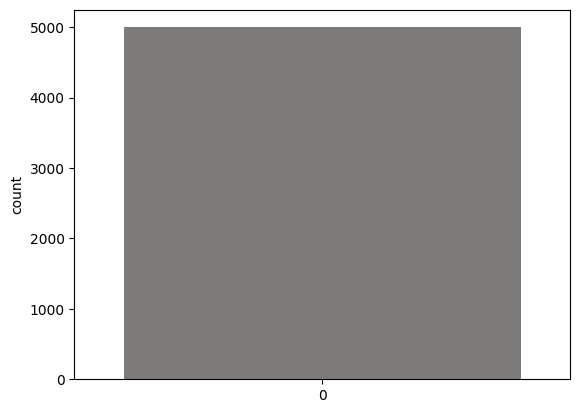

In [ ]:
# Exploratory data analysis
sns.countplot(data["Class"],palette="cividis")
plt.show()



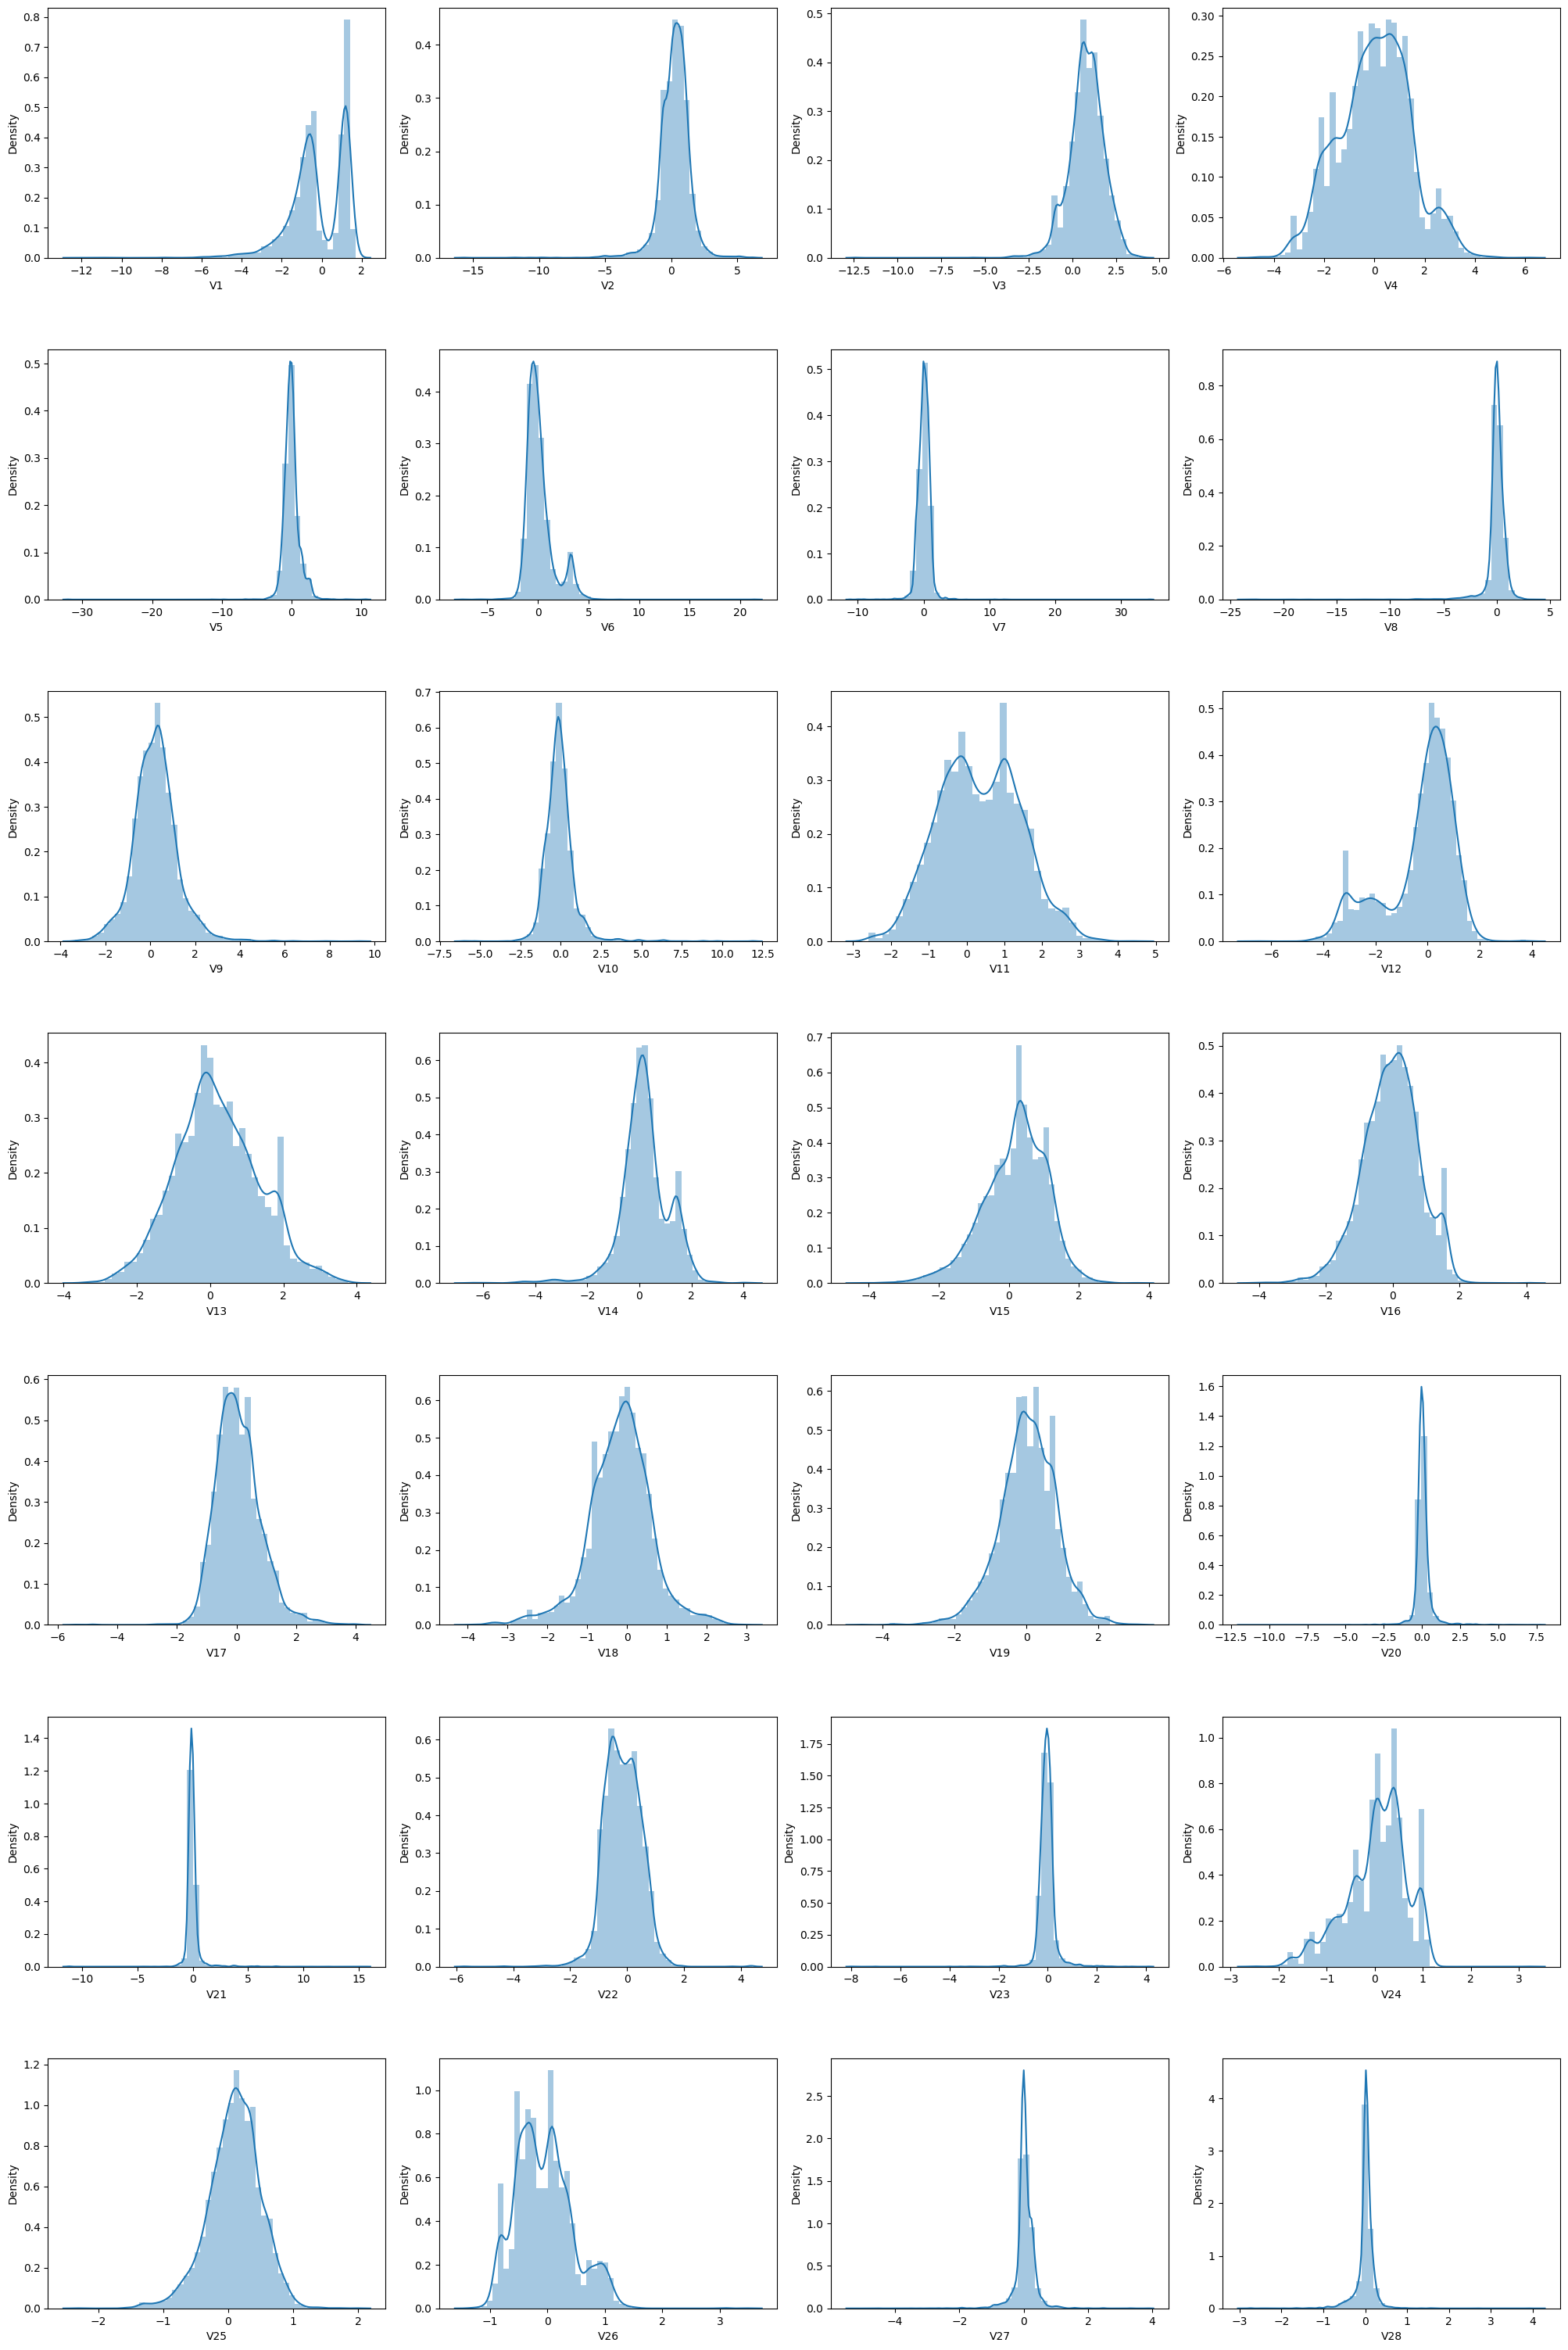

In [ ]:
df_temp=data.drop(columns=['Time','Amount','Class'],axis=1)

 # create dist plot
fig ,ax=plt.subplots(ncols=4,nrows=7,figsize=(20,30))
index=0
ax=ax.flatten()
for col in df_temp.columns:
  sns.distplot(df_temp[col],ax=ax[index])
  index +=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=5)


### Corelation matrix

<Axes: >

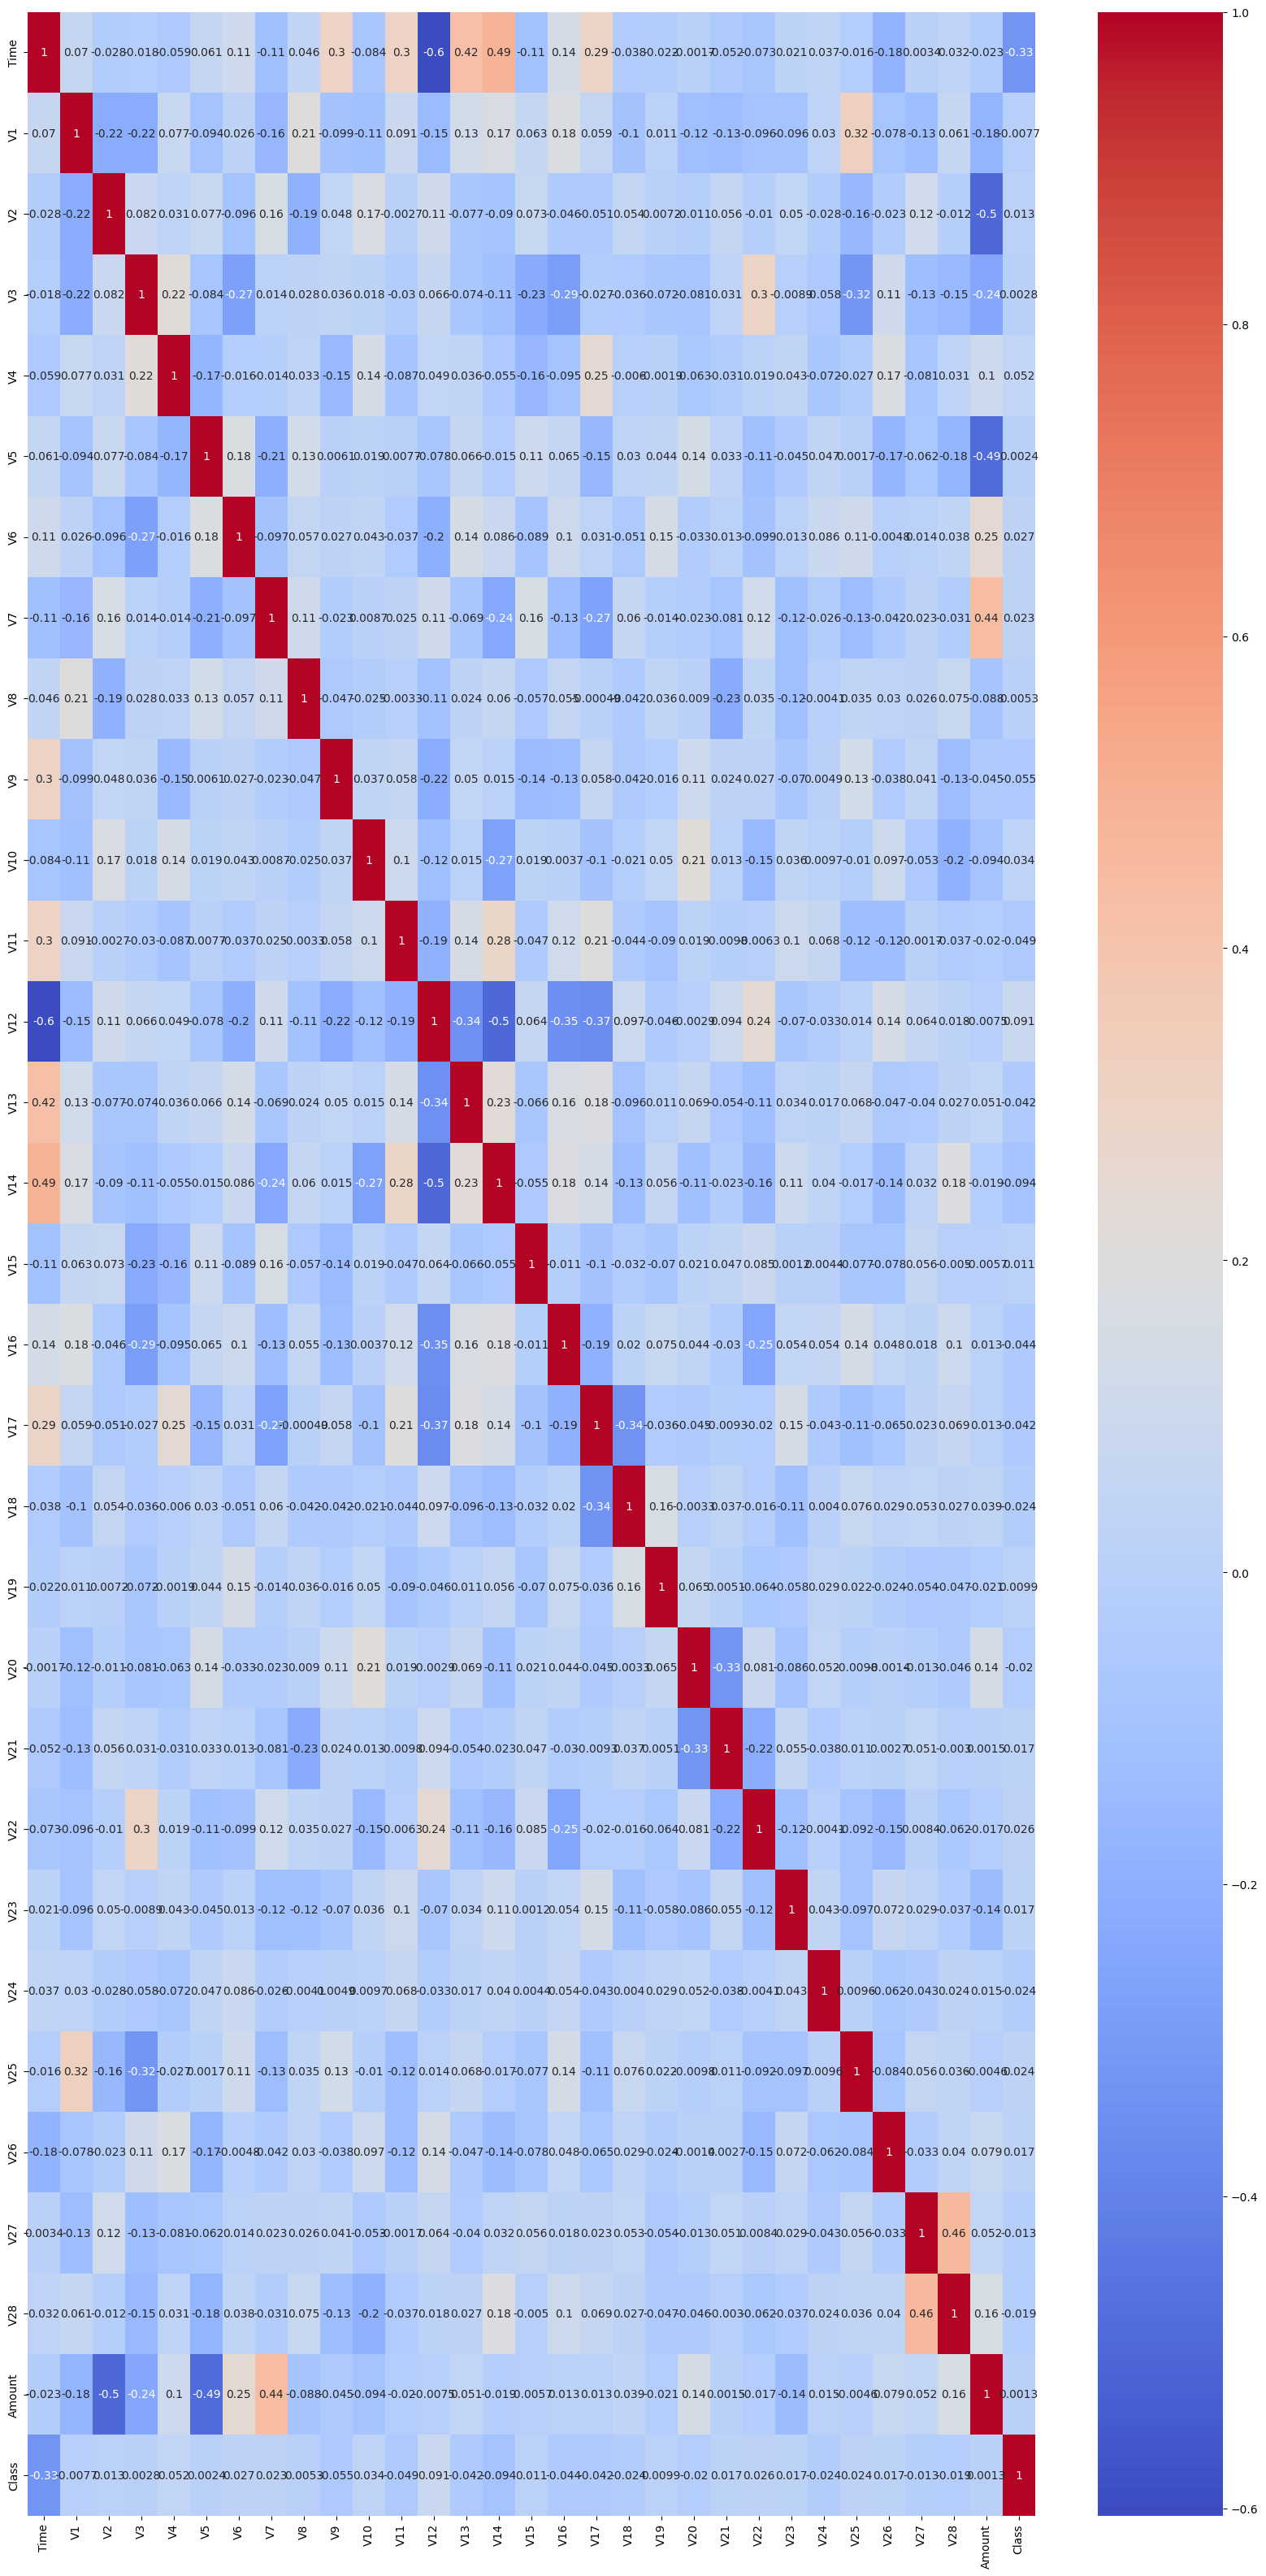

In [ ]:
corr=data.corr()
plt.figure(figsize=(20,40))
sns.heatmap(corr,annot=True,cmap='coolwarm')



### input split

In [ ]:
x=data.drop(columns=['Class'],axis=1)
y=data['Class']



from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaler=sc.fit_transform(x)


In [ ]:
x_scaler[-1]

array([ 1.86781045, -0.93209878,  1.26624973,  0.1700821 , -0.33896453,
       -0.49299545, -0.67430537, -0.1090747 ,  0.69613265,  0.47323151,
       -0.99603575,  1.56941382, -0.3240391 ,  2.13075294,  1.79290084,
       -2.35344304,  0.36329955,  0.59947252,  0.26646393, -0.37240319,
       -0.19592352, -0.23828761, -0.34223337,  0.24116388,  0.77353225,
       -0.63852303,  0.56616479,  0.2913338 ,  0.39691753, -0.30290362])

### model training

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=42,stratify=y)

In [ ]:
#logistic regression


model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))
print("f1_score-",f1_score(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1194
           1       0.76      0.46      0.58        56

    accuracy                           0.97      1250
   macro avg       0.87      0.73      0.78      1250
weighted avg       0.97      0.97      0.97      1250

f1_score- 0.5777777777777777


In [ ]:
#random forest
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))
print("f1_score-",f1_score(y_test,y_pred))




              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1194
           1       0.86      0.66      0.75        56

    accuracy                           0.98      1250
   macro avg       0.92      0.83      0.87      1250
weighted avg       0.98      0.98      0.98      1250

f1_score- 0.7474747474747474


### class imbalancemnent

<Axes: ylabel='count'>

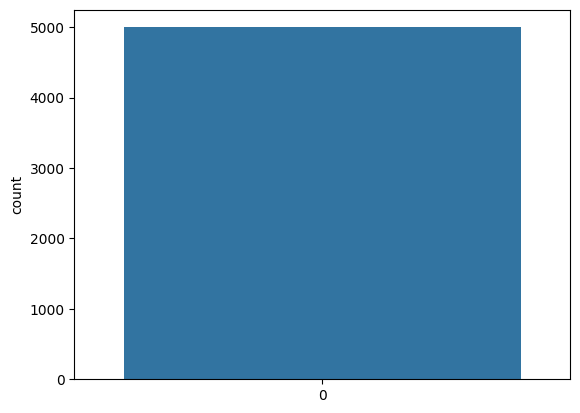

In [ ]:
sns.countplot(data['Class'])


In [ ]:
#useing the combination of over_sampling,under_sampling
#balance the class with equal distributaion

from imblearn.over_sampling import SMOTE
over_sample=SMOTE()
x_smote,y_smote=over_sample.fit_resample(x_train,y_train)


<Axes: ylabel='count'>

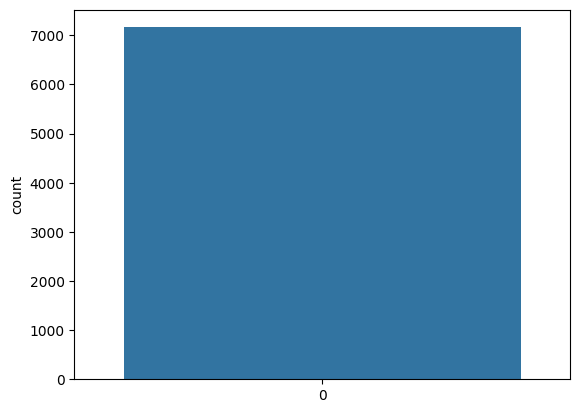

In [ ]:
sns.countplot(y_smote)

In [ ]:
#again train & test
#logistic regression


model=LogisticRegression()

#training
model.fit(x_smote,y_smote)

#testing
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))
print("f1_score-",f1_score(y_test,y_pred))



              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1194
           1       0.46      0.96      0.62        56

    accuracy                           0.95      1250
   macro avg       0.73      0.96      0.80      1250
weighted avg       0.97      0.95      0.96      1250

f1_score- 0.6242774566473989


In [ ]:
#random forest
model=RandomForestClassifier(n_jobs=-1)

#training
model.fit(x_smote,y_smote)

#testing
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))
print("f1_score-",f1_score(y_test,y_pred))




              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1194
           1       0.80      0.79      0.79        56

    accuracy                           0.98      1250
   macro avg       0.89      0.89      0.89      1250
weighted avg       0.98      0.98      0.98      1250

f1_score- 0.7927927927927927
